In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CSCI 3343 Pset 1: Prerequisite (Maths + Python)

**Posted:** Monday, August 30, 2021

**Due:** Friday, September 3, 2021

__Total Points__: 13 

__Name__:
Dawin Ye, yedg

(e.g. Donglai Wei, weidf)

__Submission__: please rename the .ipynb file as __\<your_username\>_pset1.ipynb__ before you submit it to canvas. Example: weidf_pset1.ipynb.

# Goal

To better study computer vision, you need to have a good foundation in maths (**Linear algebra** and **Calculus**) and **Python** (used for most computer vision and deep learning code base). In Pset 1, we will
- revisit some core maths concepts and code them up in Python;
- learn to play with images in Python.

**Reminders:**
- If you are unfamiliar with the above topics, here are the links to optional refreshers for [linear algebra](https://www.youtube.com/playlist?list=PL0-GT3co4r2y2YErbmuJw2L5tW4Ew2O5B), [calculus](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr), and [Python](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb). 
-  Get ready to self-learn/figure out new materials in Psets, which is the real skill we hope you can gain from the class.
- Please do not share the answers directly or copy-and-paste solutions from online. Hope you can think and struggle through the questions to gain a better understanding of course materials :)

Happy Hacking!

# Problem 1 Linear Algebra (4 pts)

Below, you will first write out the mathematical definition of matrix/vector arithmatics. Then you will implement them with the Python [`math`](https://docs.python.org/3/library/math.html) module. We provide test cases to compare your functions with Numpy functions.

(a) [1 pt] Write down the definition of the **Euclidean norm** of a vector $\|a\|$, where $a=(a_0,...,a_{n-1})$. Implement it in function `vector_norm()`.


$\|a\|= \sqrt[]{a_{0}^{2}+...+a_{n-1}^{2}}$


In [ ]:
import numpy as np
import math

def vector_norm(x):
  # x: 1D vector
  #### TODO: implement the norm function
  # hint: length of the 1D vector is: len(x)  
  # hint: i-th element in the vector is: x[i]  
  output = 0
  for i in range(len(x)):
    output += (x[i]**2)
  return math.sqrt(output)

### unit test
# generate random numbers
a = np.random.random(50)
norm_np = np.linalg.norm(a)
norm_yours = vector_norm(a)

# let's check if your implementation result agrees with the Numpy package
print("Vector norm: Numpy=%.4f, Yours=%.4f" % (norm_np, norm_yours)) 

Vector norm: Numpy=3.9207, Yours=3.9207


(b) [1 pt]  Write down the definition of the **dot product** bewteen two vectors $a$ and $b$, where $a=(a_0,...,a_{n-1})$ and $b=(b_0,...,b_{n-1})$. Implement it in function `vector_dot()`.

$a\cdot b = a_{0}b_{0}+...+a_{n-1}b_{n-1}$

In [ ]:
import numpy as np
import math

def vector_dot(x, y):
  # x: 1D array
  # y: 1D array
  #### TODO: implement the dot product function
  # hint: length of the 1D vector is: len(x)  
  # hint: i-th element in the vector is: x[i]  
  output = 0
  for i in range(len(x)):
    output += (x[i]*y[i])
  return output


### unit test
# generate random numbers
a = np.random.random(50)
b = np.random.random(50)
dot_np = np.dot(a, b)
dot_yours = vector_dot(a, b)

# let's check if your implementation result agrees with the Numpy package
print("Vector dot product: Numpy=%.4f, Yours=%.4f" % (dot_np, dot_yours)) 

Vector dot product: Numpy=10.6572, Yours=10.6572


(c) [1 pt]  Write down the definition of the **matrix-vector** multiplication bewteen a $m\times n$ matrix $A=\begin{bmatrix}a_{0,0}&\dots&a_{0,n-1} \\\vdots & \ddots &\vdots\\ a_{m-1,0} & \dots &a_{m-1,n-1}\end{bmatrix}$ and a $n\times 1$ vector $b=\begin{bmatrix}b_0\\\vdots\\b_{n-1}\end{bmatrix}$. Implement it in function `matrix_vector_mul()`. 

Hints: 
- For the definition, you can either write out with $a_{ij}$ or with row vector $A_{i,*}=\begin{bmatrix}a_{i,0}&\dots&a_{i,n-1}\end{bmatrix}$. 
- For the implementation, you may reuse the `vector_dot` function above.

$Ab = \begin{bmatrix}  a_{0,0}b_{0} + ... + a_{0,n-1}b_{n-1} \\ \vdots\ \\  a_{m-1, 0}b_{0}+ ...+  a_{m-1,n-1}b_{n-1} \end{bmatrix}$

In [ ]:
import numpy as np
import math

def matrix_vector_mul(x, y):
  # x: m x n matrix
  # y: n x 1 vector
  #### TODO: implement the multiplication
  # hint: x.shape = [m, n]
  # hint: i-th row of matrix: x[i]
  # hint: i-th column of matrix: x[:, i]

  # create the output vector
  output_size = x.shape[0]
  output = np.zeros(output_size)
  for i in range(x.shape[0]):
    output[i] = vector_dot(x[i], y)

  return output

### unit test
# generate random numbers
a = np.random.random([20,50])
b = np.random.random([50])
matrix_vector_np = np.matmul(a, b)
matrix_vector_yours = matrix_vector_mul(a, b)

# let's check if your implementation result agrees with the Numpy package
diff = np.linalg.norm(matrix_vector_np - matrix_vector_yours)
print("Matrix-vector multiplication: | Numpy - Yours| = %.4f" % diff )

Matrix-vector multiplication: | Numpy - Yours| = 0.0000


(d) [1 pt]  Write down the definition of the **matrix-matrix** multiplication bewteen a $m\times n$ matrix $A=\begin{bmatrix}a_{0,0}&\dots&a_{0,n-1} \\\vdots & \ddots &\vdots\\ a_{m-1,0} & \dots &a_{m-1,n-1}\end{bmatrix}$ and a $n\times p$ vector $b=\begin{bmatrix}b_{0,0}&\dots&b_{0,p-1} \\\vdots & \ddots &\vdots\\ b_{n-1,0} & \dots &b_{n-1,p-1}\end{bmatrix}$. Implement it in function `matrix_matrix_mul()`. 

Hints: 
- For the definition, try to reuse the defined operations above, e.g., $a\cdot b$ or $Ab$. For $A$, $i$-th row vector is $A_{i,*}=\begin{bmatrix}a_{i,0}&\dots&a_{i,n-1}\end{bmatrix}$ and $i$-th column vector is $A_{*,i}=\begin{bmatrix}a_{0,i}\\\vdots\\a_{m-1,i}\end{bmatrix}$.
- For the implementation, you may reuse the `matrix_vector_mul` or `vector_dot` function above.

$AB = \begin{bmatrix} a_{0,*} \: \cdot  \; b_{*, 0}\; & ... & a_{0,*} \; \cdot  \; b_{*, p-1}\; \\ \vdots & \ddots &\vdots\\ a_{m-1, *} \: \cdot  \; b_{*, 0}\; & ... & a_{m-1,*} \; \cdot  \; b_{*, p-1}\;\end{bmatrix}$ 

In [ ]:
import numpy as np
import math

def matrix_matrix_mul(x, y):
  # x: m x n matrix
  # y: n x p vector
  #### TODO: implement the multiplication
  # hint: x.shape = [m, n]
  # hint: i-th row of matrix: x[i]
  # hint: i-th column of matrix: x[:, i]

  # create the output vector
  output_size = [x.shape[0], y.shape[1]]
  output = np.zeros(output_size)
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      output[i][j] += vector_dot(x[i],y[:,j])
    
  return output

### unit test
# generate random numbers
a = np.random.random([20, 50])
b = np.random.random([50, 10])
matrix_matrix_np = np.matmul(a, b)
matrix_matrix_yours = matrix_matrix_mul(a, b)

# let's check if your implementation result agrees with the Numpy package
diff = np.linalg.norm(matrix_matrix_np - matrix_matrix_yours)
print("Matrix-vector multiplication: | Numpy - Yours| = %.4f" % diff )

Matrix-vector multiplication: | Numpy - Yours| = 0.0000


# Problem 2 *Calculus* (6 pts)

## Problem 2.1 Univariate Calculus (3 pts)
One major building block of the neural network model is the standard logistic function: $\sigma(x) = \dfrac{1}{1+e^{-x}}$. Let's try to gain better understanding about the variants of this non-linear function through computing its gradient.

(a) [1 pt] Derive $\dfrac{d}{dx}\sigma(x)$

$\dfrac{d}{dx}\sigma(x) =  \frac{e^{-x}}{{(1+e^{x})}^2}$

(b) [1 pt] Derive $\dfrac{d}{dx}g(x) = \dfrac{d}{dx}\sigma(f(x))$, where $f(x) = x^3+2x^2+1$. Hint: use the chain rule.

$\dfrac{d}{dx}g(x) = \frac{e^{-x^{3}-2x^{2}-1}(3x^{2}+4x)}{(1+e^{-x^{3}-2x^{2}-1})^{2}}$

(c) [1 pt] Remember that geometrically $\dfrac{d}{dx}g(x_0)$ is the slope of $g(x)$ at point $x_0$. We here show you how to implement `g(x)` and plot it as a 1D curve.
- **TODO:** Implement $\dfrac{d}{dx}g(x_0)$ in function `Dg`
- **Unit Test:** We provide the code to plot the tangent vectors (computed by your implemented `Dg`) on top of the curve.

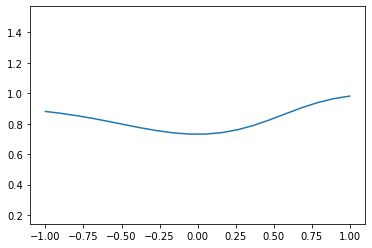

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# provided implementation of g(x)
def g(x):
  # return the value of the defined \sigma(f(x)) at value x
  f = x**3+2*x**2+1
  return 1/ (1+np.exp(-f))

# get an array of x-axis values: 100 numbers between -3 and 2 with a uniform interval
xx = np.linspace(-1,1,20)
plt.plot(xx,g(xx))
plt.axis('equal')
plt.show()

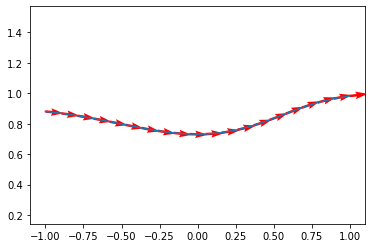

In [ ]:
def Dg(x):
  #### TODO: implement Dg(x), gradient of g(x)  
  f = x**3+2*x**2+1  
  df = 3*x**2 + 4*x
  return (np.exp(-f)*df)/((1+np.exp(-f))**2)

### Unit Test: the vectors should follow the function curve
plt.plot(xx,g(xx))
# create tagent vectors
uu = np.ones(len(xx))
vv = Dg(xx)
# plot tagent vectors at the end points (xx, g(xx))
plt.quiver(xx, g(xx), uu, vv, color='r')
plt.axis('equal')
plt.show()

## Problem 2.2. Multivariate Calculus (3 pts)
In most deep learning tutorials, you will encounter $\sigma(W\mathbf{x}+ \mathbf{b})$ (i.e., one common version of the fully-connected layer), where $W=\begin{bmatrix}W_{0,0} & \dots & W_{0,n-1}\\ \vdots & \ddots & \vdots\\ W_{m-1,0}&\dots & W_{m-1,n-1}\end{bmatrix}$ is a $m\times n$ matrix, $\mathbf{x}=\begin{bmatrix}x_0\\ ..\\ x_{n-1}\end{bmatrix}$ a $n\times 1$ array, and $\mathbf{b}=\begin{bmatrix}b_0\\ ..\\ b_{m-1}\end{bmatrix}$ a $m\times 1$ array. [Source: Fully-connected layer](https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html) (until Figure 4-4). We'll cover it in Lecture 8.

For (a-b): $\mathbf{x}$ is the input data which is known. The goal is to optimize (i.e., compute gradient) the neural network model parameters $W$ and $\mathbf{b}$. You can assume $W$, $\mathbf{x}$, and $\mathbf{b}$ are independent from each other, i.e. $\dfrac{\partial W}{\partial x_i}=0$.

For (c): the gradient for the input data $\mathbf{x}$ is still useful, e.g., debugging which pixels lead to the final prediction or [deep dreaming](https://en.wikipedia.org/wiki/DeepDream) (more in Lecture 9).

<hr/>
Hint: For vector calculus, first figure out the size of the array/matrix, and then try to write out its scalar element in a concise form with matrix-row/-column. For example, given a variable $t$: 

$\sigma(W\mathbf{x}+ \mathbf{b}) = \begin{bmatrix}\sigma(W_0\mathbf{x}+b_0) \\ \vdots\\ \sigma(W_{m-1} \mathbf{x}+b_{m-1})\end{bmatrix}$, where $W_i$ is the $i$-th row. 

Thus, $\dfrac{\partial}{\partial t}\sigma(W\mathbf{x}+ \mathbf{b})= \begin{bmatrix}\frac{\partial\sigma(W_0\mathbf{x}+b_0)}{\partial t} \\ \vdots\\ \frac{\partial\sigma(W_{m-1} \mathbf{x}+b_{m-1})}{\partial t}\end{bmatrix}$ for a variable `t`.

(a) [1 pt] Derive $\dfrac{\partial}{\partial x_i}\sigma(W\mathbf{x}+\mathbf{b})$

$\dfrac{\partial}{\partial x_i}\sigma(W\mathbf x+\mathbf{b})= \begin{bmatrix} \frac{e^{-x}}{{(1+e^{x})}^2}W_{0,i} \\ \vdots \\ \frac{e^{-x}}{{(1+e^{x})}^2}W_{m-1,i}\end{bmatrix}$

(b) [1 pt] Derive $\dfrac{\partial}{\partial b_i}\sigma(W\mathbf x+\mathbf{b})$

$\dfrac{\partial}{\partial b_i}\sigma(W\mathbf x+\mathbf{b})= \begin{bmatrix} 0 \\ \vdots\ \\ 0 \\ \frac{e^{-x}}{{(1+e^{x})}^2} \\ 0 \\ \vdots \\ 0\end{bmatrix}$ 
the ith row of this column vector is the nonzero entry, whether it is the first, in the middle, or the last. 

(c) [1 pt] Derive $\dfrac{\partial}{\partial W_{ij}}\sigma(W\mathbf x+\mathbf{b})$

$\dfrac{\partial}{\partial W_{ij}}\sigma(W\mathbf x+\mathbf{b})=\begin{bmatrix} 0 \\ \vdots \\ 0 \\ \frac{e^{-x}}{{(1+e^{x})}^2}x_j \\ 0 \\ \vdots \\ 0\end{bmatrix}$ 
the middle element can also replace one of the zeroes, but only one of the entries should be non zero

# Problem 3 Image Basics (3 pts)


## Data preparation

In [ ]:
# download the image and rename it as bc_eagle.png
! wget https://csci3343.github.io/f21/src/public_image//bc_eagle.png -O bc_eagle.png

--2021-09-03 19:15:36--  https://csci3343.github.io/f21/src/public_image//bc_eagle.png
Resolving csci3343.github.io (csci3343.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to csci3343.github.io (csci3343.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21473 (21K) [image/png]
Saving to: ‘bc_eagle.png’

bc_eagle.png        100%[===================>]  20.97K  --.-KB/s    in 0.001s  

2021-09-03 19:15:36 (19.7 MB/s) - ‘bc_eagle.png’ saved [21473/21473]



In [ ]:
# make a black and white image out of the color image
# just run it. no need to understand the code for now..
import cv2
# force to read the image as a black and white image
im = cv2.imread('bc_eagle.png', 0)
cv2.imwrite('bc_eagle_gray.png', im)

True

## Background: Image as a matrix/tensor
- Image: A digital image can be represented as a rectangle grid of small **squares** (i.e., **pixel**), each with its own singe-color. With the size of squares becomes smaller, we begin to perceive the blocky squares as a smooth image. Thus, an image `im` can be represented as a 2D matrix, where <font color='red'>`im[y,x]` stores the color value of the pixel at the integer location `(y,x)`</font>.

- Grayscale image: A grayscale image (aka., black and white image) stores a scalar value for the brightness of each pixel. For the commonly used 8-bit grayscale image, the pixel value is an integer between 0-255, where `0 for black, 255 for white`.

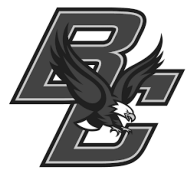

Image size: (214, 235)
Pixel value range: 0 - 255
Pixel brightness value at position (100, 100): 67


In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
# set figure size
plt.figure(figsize=(4, 3)) 

# read in the image
im_eagle_gray = imread('bc_eagle_gray.png')

# visualize the image
plt.imshow(im_eagle_gray, cmap='gray'); plt.axis('off'); plt.show()

# get the image size: height, width
im_size = im_eagle_gray.shape
im_min, im_max = im_eagle_gray.min(), im_eagle_gray.max()
print("Image size:", im_size)
print("Pixel value range: %d - %d" % (im_min, im_max))
# y: row; x: column
y, x = 100, 100
print("Pixel brightness value at position (%d, %d): %d" % (y, x, im_eagle_gray[y, x]) )

- Color image: Optics researches show that all colors can be approximated by mixing different amounts of three primary colors: <font color='red'>red</font>, <font color='green'>green</font>, and <font color='blue'>blue</font>. 
For a RGB color image, each pixel stores three values to indicate the amount of (red, green, and blue) respectively. 
Thus, a RGB color image is stored as a 3D tensor, where <font color='red'>`im[y,x,c]` returns the `c`-th channel value for the pixel (square) at the integer location `(y,x)`</font>. For the commonly used 8-bit RGB color image, the range of the RGB pixel value is (0,0,0) - (255,255,255). Thus, each pixel can have one of $(2^{8})^3=2^{24}\approx$ 16M colors. (Optional reading: [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model))

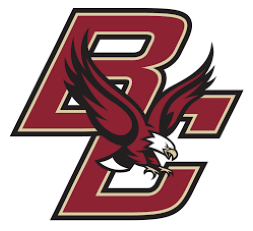

Image size: (214, 235, 3)
Pixel RGB value range: (0,0,0) - (255,255,255)
Pixel RGB value at position (100, 100):  [140  34  50]


In [ ]:
# read in the image
im_eagle_rgb = imread('bc_eagle.png')

# visualize the image
plt.imshow(im_eagle_rgb); plt.axis('off'); plt.show()

# get the image size: heigh, width
im_size = im_eagle_rgb.shape
im_min = [im_eagle_rgb[:,:,c].min() for c in range(3)]
im_max = [im_eagle_rgb[:,:,c].max() for c in range(3)]
print("Image size:", im_size)
print("Pixel RGB value range: (%d,%d,%d) - (%d,%d,%d)" % \
      (im_min[0], im_min[1], im_min[2], im_max[0], im_max[1], im_max[2]))
# y: row; x: column
y, x = 100, 100
print("Pixel RGB value at position (%d, %d): " % (y, x), im_eagle_rgb[y, x])

## Problem 3.1 Eagles in Other Colors (3 pts)
Here are some common colors and there rgb value. Same as the grayscale image, 0 is black and 255 is white, which translates intom black = (0,0,0), white = (255,255,255) for RGB images. As you can guess, red=(255,0,0), green=(0,255,0), blue=(0,0,255), which maxs out its own color channel and assigning 0 to others. 

(a) [1 pt] Learn to create images with certain color. We provide demo code to create rectangles with black and red color.
- **TODO:** Finish the code to create green square image (`im_test_green`) and blue square image (`im_test_blue`).

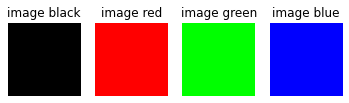

In [ ]:
# color assignment
# black: make all channels 0
import numpy as np

# demo: start from a black image
im_test = np.zeros([100,100,3], np.uint8)

# demo: create a red image: (255,0,0)
im_test_red = im_test.copy()
im_test_red[:,:,0] = 255

#### TODO: create a green image: (0,255,0)
im_test_green = im_test.copy()
im_test_green[:,:,1] = 255

#### TODO: create a blue image: (0,0,255)
im_test_blue = im_test.copy()
im_test_blue[:,:,2] = 255

# plot images
plt.subplot(1,4,1); plt.imshow(im_test); plt.axis('off'); plt.title('image black')
plt.subplot(1,4,2); plt.imshow(im_test_red); plt.axis('off'); plt.title('image red')
plt.subplot(1,4,3); plt.imshow(im_test_green); plt.axis('off'); plt.title('image green')
plt.subplot(1,4,4); plt.imshow(im_test_blue); plt.axis('off'); plt.title('image blue')
plt.show()

(b) [1 pt] Learn to generate binary image mask through color thresholding. We provide demo code to have a rough foreground mask by assigning `True` to pixels that have the red channel value between 120-150. Notice that the initial binary mask looks okay, but have many noisy pixels.
- **TODO**: Start from this initial mask and further threshold the blue channel and assign `True` to pixels with value less than 100. In other words, for the final foreground binary mask variable, only pixels that has red value between 120-150 and blue value less than 100 are `True`.

Hint: `*` multiplication of binary matrices is the same as taking `logical_and`.

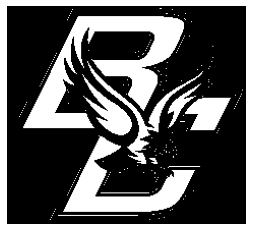

In [ ]:
# demo: create a rough foreground mask by thresholding red channel value to be between [120,150]
fg_mask = (im_eagle_rgb[:,:,0]<150)*(im_eagle_rgb[:,:,0]>120)
plt.imshow(fg_mask, cmap='gray'); plt.axis('off')
plt.show()

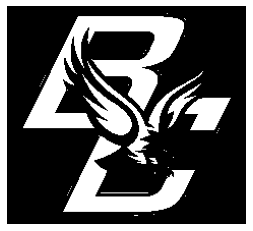

In [ ]:
#### TODO: in addition, threshold the image with blue channel below 100
fg_mask = (im_eagle_rgb[:,:,2]<100) * fg_mask
plt.imshow(fg_mask, cmap='gray'); plt.axis('off')
plt.show()

(c) [1 pt] Learn to assign image colors where the binary mask is `True`. Here, we will keep the white background and only change the color for pixels within the foreground mask `fg_mask` computed above.

**TODO:** Complete the `logoRecolor` function that assigns pixels covered by the foreground mask to the new RGB color. 

**Target:** Four eagles in different colors

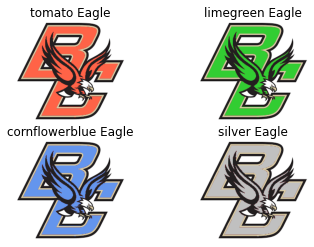

In [ ]:
# (b) change the logo color
# for more common colors: https://www.w3.org/wiki/CSS/Properties/color/keywords
colors={}
colors['tomato'] = [255,99,71]
colors['limegreen'] = [	50,205,50]
colors['cornflowerblue'] = [100,149,237]
colors['silver'] = [192,192,192]

def logoRecolor(image, color_new):
  # make a copy, otherwise it is a pointer to the original image
  # where our changes will mess up the original image
  im_recolor = im_eagle_rgb.copy()
  
  for c in range(3):
    # select each color channel
    im_c = im_recolor[:,:,c] # this is a pointer: change it will change the output
    #### TODO: assign new color for pixels where the fg_mask value is 1
    # hint: https://numpy.org/doc/stable/user/basics.indexing.html#boolean-or-mask-index-arrays
    
    im_c[fg_mask] = color_new[c]

  return im_recolor

for i, color_name in enumerate(colors.keys()):
  ax=plt.subplot(2, 2, 1+i)  
  plt.imshow(logoRecolor(im_eagle_rgb, colors[color_name]))
  ax.set_title(color_name + ' Eagle')
  plt.axis('off')
plt.show()